### Задача ранжирования экспертов

Рассмотрена задача согласования экспертных оценок. Заданы множество объектов и множество показателей, при этом каждому объекту и показателю поставлена в соответствие экспертная оценка. Объекты можно оценивать как через экспертную оценку, так и через взвешенную сумму показателей, где веса определяются экспертами.

In [22]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
from matplotlib import pyplot as plt

Всего у нас m объектов и n показателей. Матрица А - измерения показателей каждого объекта

Так же есть набор экспертов, для каждого известен вектор оценок объектов (интегральные индикаторы) $q_{0}$ и вектор оценок показателей $w_{0}$

In [53]:
A = pd.read_excel('A.xlsx', header=None)
A = A.fillna(0)
A

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,72.0,85.0,9.0,2.0,4.4,4.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,3.0,9.0,7,7.0,0.0,6.0
1,640.0,69.0,25.0,52.0,17.0,2.0,6.0,4.0,8.0,7.0,...,3.0,3.0,0.0,4.0,6.0,3.0,4,7.0,7.0,2.0
2,42.0,5.9,3.4,2.5,5.0,5.0,1.0,5.0,5.0,4.0,...,8.0,4.0,2.0,3.0,5.0,5.0,6,4.0,6.0,0.0
3,371.0,34.0,3.6,0.4,20.0,7.0,7.0,2.0,3.0,2.0,...,4.0,6.0,3.0,5.0,0.0,6.0,5,2.0,8.0,1.0
4,250.0,8.0,1.0,3.2,6.5,0.0,2.0,7.0,2.0,6.0,...,5.0,5.0,7.0,0.0,7.0,7.0,8,6.0,5.0,0.0
5,545.0,100.0,5.0,33.0,56.5,3.0,4.0,1.0,9.0,5.0,...,1.0,1.0,6.0,6.0,1.0,2.0,2,5.0,1.0,4.0
6,360.7,35.6,7.7,19.1,39.5,0.0,3.0,3.0,0.0,1.0,...,6.0,2.0,1.0,1.0,2.0,8.0,9,1.0,2.0,5.0
7,57.0,5.9,3.0,3.2,4.0,6.0,5.0,8.0,4.0,8.0,...,7.0,7.0,4.0,7.0,0.0,1.0,1,8.0,4.0,0.0
8,334.0,4.0,12.0,2.0,67.0,1.0,8.0,6.0,1.0,3.0,...,2.0,8.0,5.0,2.0,4.0,4.0,3,3.0,3.0,3.0
9,365.0,16.0,12.0,1.3,59.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,0.0,0.0,0.0


In [54]:
Psi = pd.read_excel('Psi.xlsx')
Psi = Psi.fillna(0)
Psi

,Признаки (показатели),Стрижов,Савельев,Гребенькова,Михеев,Шокоров,Панченко,Алсаханова,Панкратов,Исламов,Волынцев,Филатов,Тихонов,Харь,Бишук,Жолобов,Северилов,Вайсер,Колесов
0,"Калорийность, кКал",6.0,3.0,9,3.0,10,7,7.0,10.0,1.0,10.0,10.0,8.0,10.0,10.0,10.0,8.0,10,10
1,"Цена 100г, руб.",7.0,8.0,9,6.0,4,8,8.0,10.0,10.0,10.0,10.0,3.0,10.0,10.0,10.0,10.0,10,10
2,Белки,8.0,9.0,9,5.0,6,9,10.0,7.0,10.0,10.0,10.0,7.0,9.0,10.0,10.0,8.0,10,10
3,Жиры,9.0,7.0,9,7.0,1,5,9.0,9.0,2.0,10.0,10.0,7.0,9.0,10.0,10.0,10.0,10,10
4,Углеводы,5.0,5.0,9,7.0,8,6,6.0,6.0,3.0,10.0,10.0,7.0,9.0,10.0,9.0,8.0,10,10
5,Стрижов,2.0,5.0,1,10.0,8,5,5.0,0.0,4.0,3.0,7.0,4.0,3.0,8.0,8.0,8.0,7,8
6,Гребенькова,0.0,10.0,9,3.0,5,5,4.0,5.0,10.0,5.0,8.0,5.0,10.0,8.0,8.0,10.0,6,8
7,Михеев,2.0,3.0,1,10.0,3,5,5.0,1.0,6.0,4.0,7.0,6.0,3.0,5.0,5.0,7.0,4,8
8,Тихонов,2.0,3.0,1,2.0,5,5,4.0,1.0,7.0,5.0,7.0,4.0,3.0,5.0,5.0,5.0,4,5
9,Панченко,2.0,3.0,1,8.0,4,6,5.0,1.0,8.0,7.0,5.0,5.0,3.0,5.0,5.0,10.0,4,5


По исходным экспертным оценкам весов показателей $w_{0}$ вычислим значение вектора интегрального индикатора: $q_{1} = Aw_{0}$. По значению $q_{0}$ вычислим веса показателей: $w_{1}=A^{+}q_{0}$. $q$ и $w$ - согласованные значения интегрального индикатора и весов показателей. если $q=Aw, w=A^{+}q$

In [55]:
A = np.array(A.values, dtype=float)
P = np.array(Psi.values[:, 1:], dtype = float)
w0 = P.T #экспертные оценки весов показателей
q0 = A[:, 5:].T #экспертные оценки интегральных операторов m объектов

In [56]:
n = q0.shape[1] #показатели
m = w0.shape[1] #объекты

Квадратичное согласование

In [57]:
def find_gamma(q0, w0):
    def f(g):
        w = np.linalg.inv(A.T@A+g*np.eye(A.shape[-1]))@(A.T@q0+g*w0)
        return (np.linalg.norm(A@w-q0)**2)/n + (np.linalg.norm(w-w0)**2)/m
    return minimize_scalar(f, bounds=(0, 100), method='Bounded').x

In [58]:
rangs = []
for k in range(q0.shape[0]):
    g = find_gamma(q0[k], w0[k])
    w = np.linalg.inv(A.T@A+g*np.eye(A.shape[-1]))@(A.T@q0[k]+g*w0[k])
    rangs.append((np.linalg.norm(A@w-q0[k])**2)/n + (np.linalg.norm(w-w0[k])**2)/m)

Эксперименты по поиску наиболее согласованного эксперта

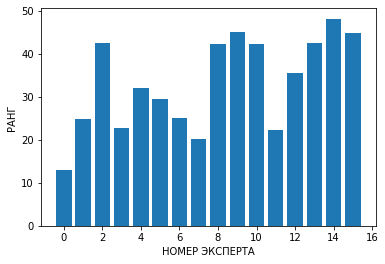

In [60]:
plt.bar(list(range(len(rangs))), rangs)
plt.xlabel('НОМЕР ЭКСПЕРТА')
plt.ylabel('РАНГ')
plt.show()

In [61]:
print('Номер лучшего эксперта =', rangs.index(max(rangs)))

Номер лучшего эксперта = 14


In [68]:
q0[14]

array([0., 7., 6., 8., 5., 1., 2., 4., 3., 0.])

In [69]:
my_rating = [9, 4, 3, 5, 8, 6, 1, 7, 2]

In [75]:
rating_severilov = [7, 1, 4, 9, 6, 3, 5, 2, 8]
rating_filippova = [9, 4, 3, 3, 7, 3, 2, 4, 6]
rating_panchenko = [9, 5, 4, 6, 7, 3, 1, 8, 2]

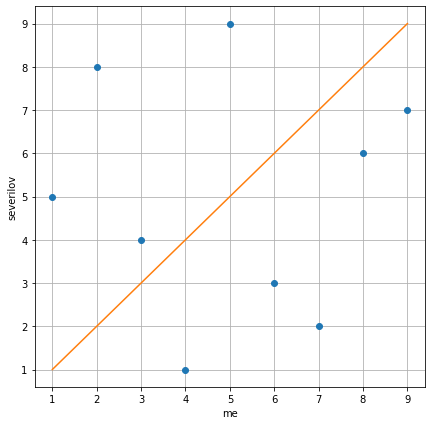

In [83]:
plt.figure(figsize=[7,7])
plt.plot(my_rating, rating_severilov, 'o')
plt.plot(list(range(1, 10)), list(range(1, 10)))
plt.xlabel('me')
plt.ylabel('severilov')
plt.grid()
plt.show()

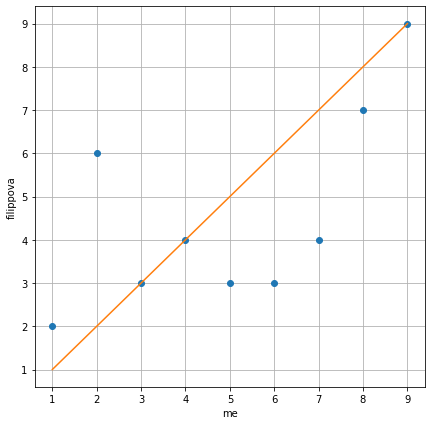

In [84]:
plt.figure(figsize=[7,7])
plt.plot(my_rating, rating_filippova, 'o')
plt.plot(list(range(1, 10)), list(range(1, 10)))
plt.xlabel('me')
plt.ylabel('filippova')
plt.grid()
plt.show()

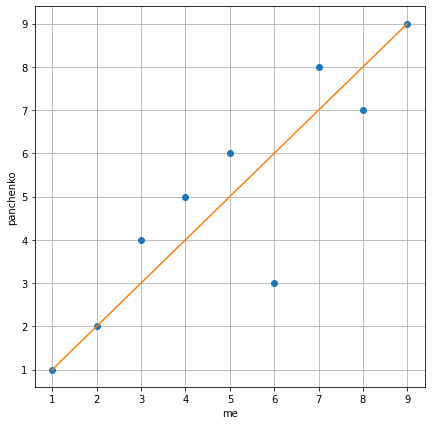

In [85]:
plt.figure(figsize=[7,7])
plt.plot(my_rating, rating_panchenko, 'o')
plt.plot(list(range(1, 10)), list(range(1, 10)))
plt.xlabel('me')
plt.ylabel('panchenko')
plt.grid()
plt.show()